## Import required modules

In [45]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates 

import numpy as np
from  wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import PIL.Image


import nltk
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS

import seaborn as sns

from textblob import TextBlob

from collections import Counter
import re

## Loading Data

In [46]:
# Load data in a dataframe

dft = pd.read_csv('textblob.csv')
dfv = pd.read_csv("vader.csv") 
dfb = pd.read_csv('bitcoin_price_with_labels.csv')

In [47]:
## Combine all headlines into a single string
text = ' '.join(dfv['Lem Headline'])

In [48]:
def get_sentiment(score):
    """
    Returns the sentiment based on compound score
    """
    
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [49]:
# Creating a new column based on compound score to get the sentiment as positive, negative or neutral using the function.
dfv['final_sentiment'] = dfv.compound.apply(lambda x: get_sentiment(x))

## Create a word cloud


##### This code below creates word cloud for visually representing the most frequent words in a collection of headlines, with more common words appearing larger in the resulting image.


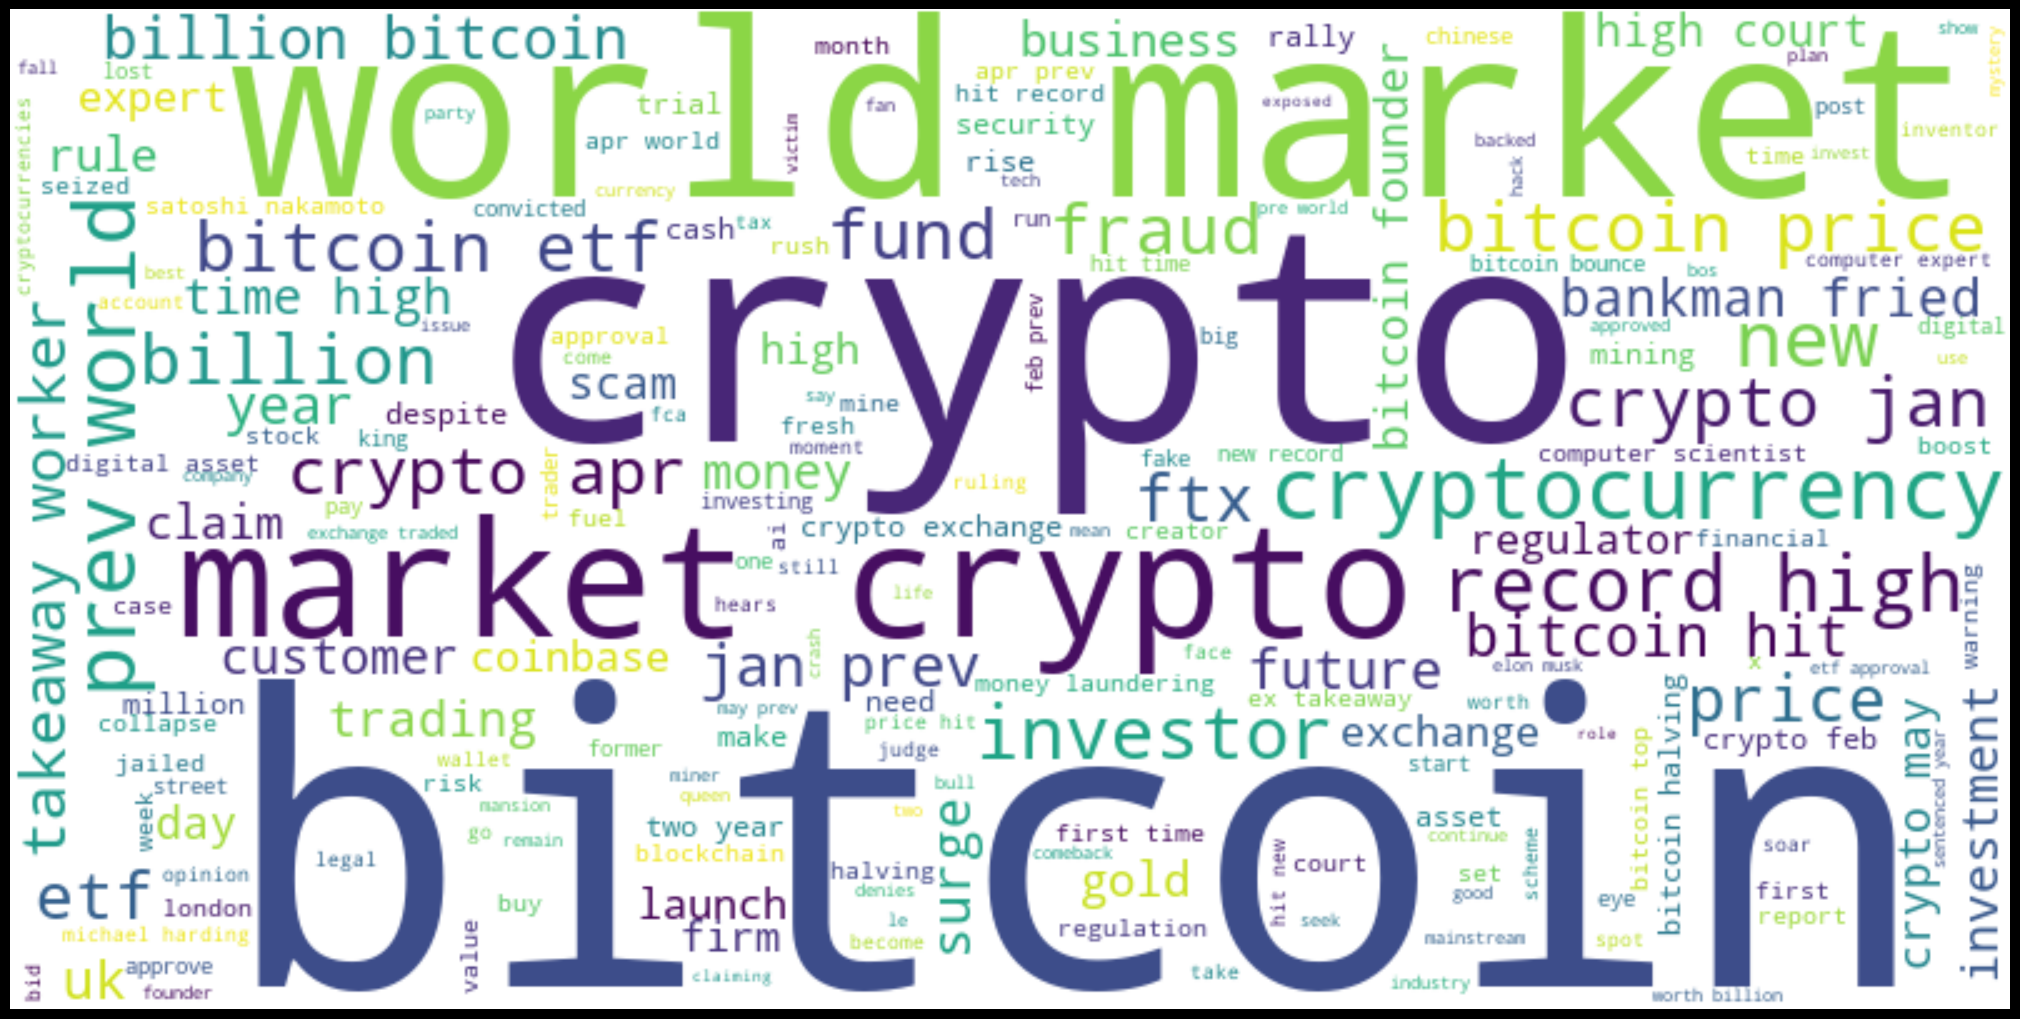

In [50]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

## Display the word cloud


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Analysing WordCloud for the most occuring words in aspects of positive, negative affect

### Negative Sentiment words Word Cloud

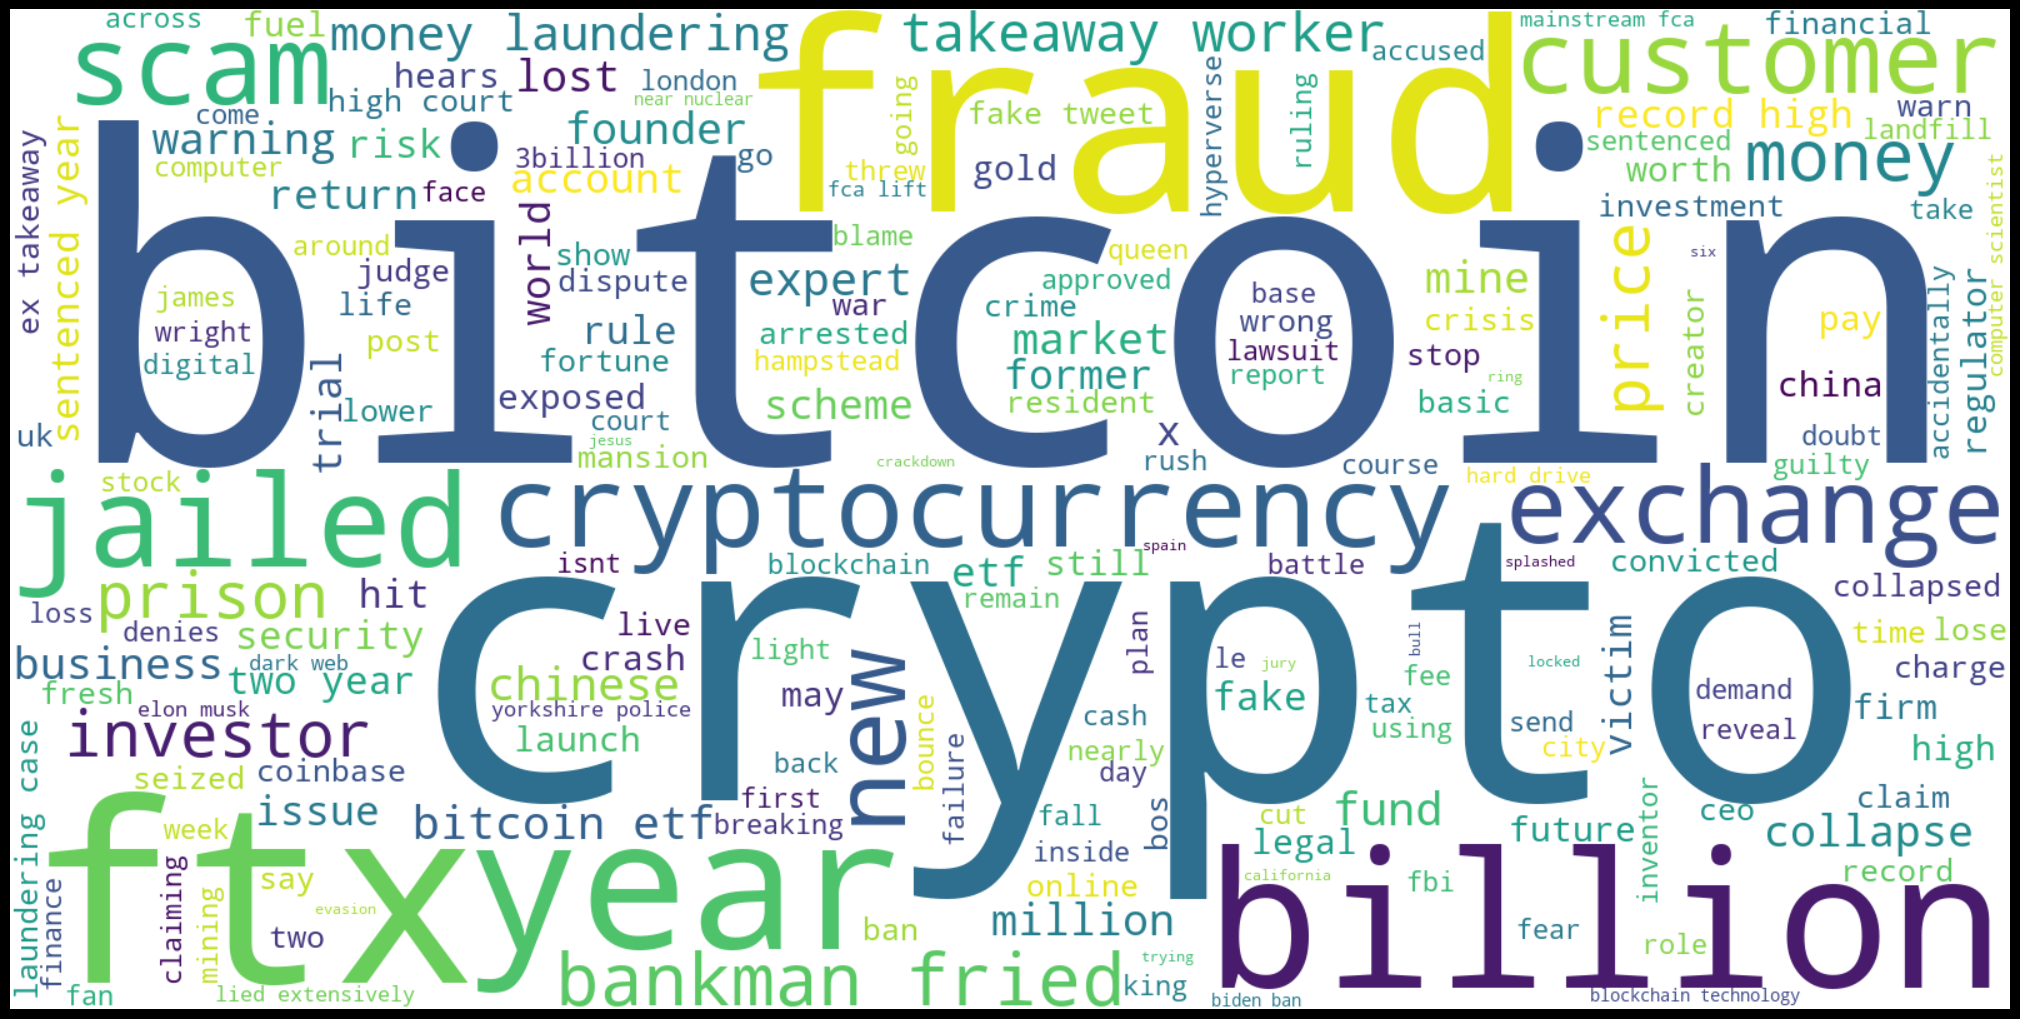

In [51]:
# look at each Sentiment words separately  e.g., negative and positive

# creating a negative sentiments df by filtering only negative samples
neg_df = dfv[dfv['final_sentiment']=='negative']

# Joining all tge Lem Headlines into text
text_neg = ' '.join(neg_df['Lem Headline'])

# Create a word cloud
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text_neg)

# Display the word cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Positive Sentiment words Word Cloud

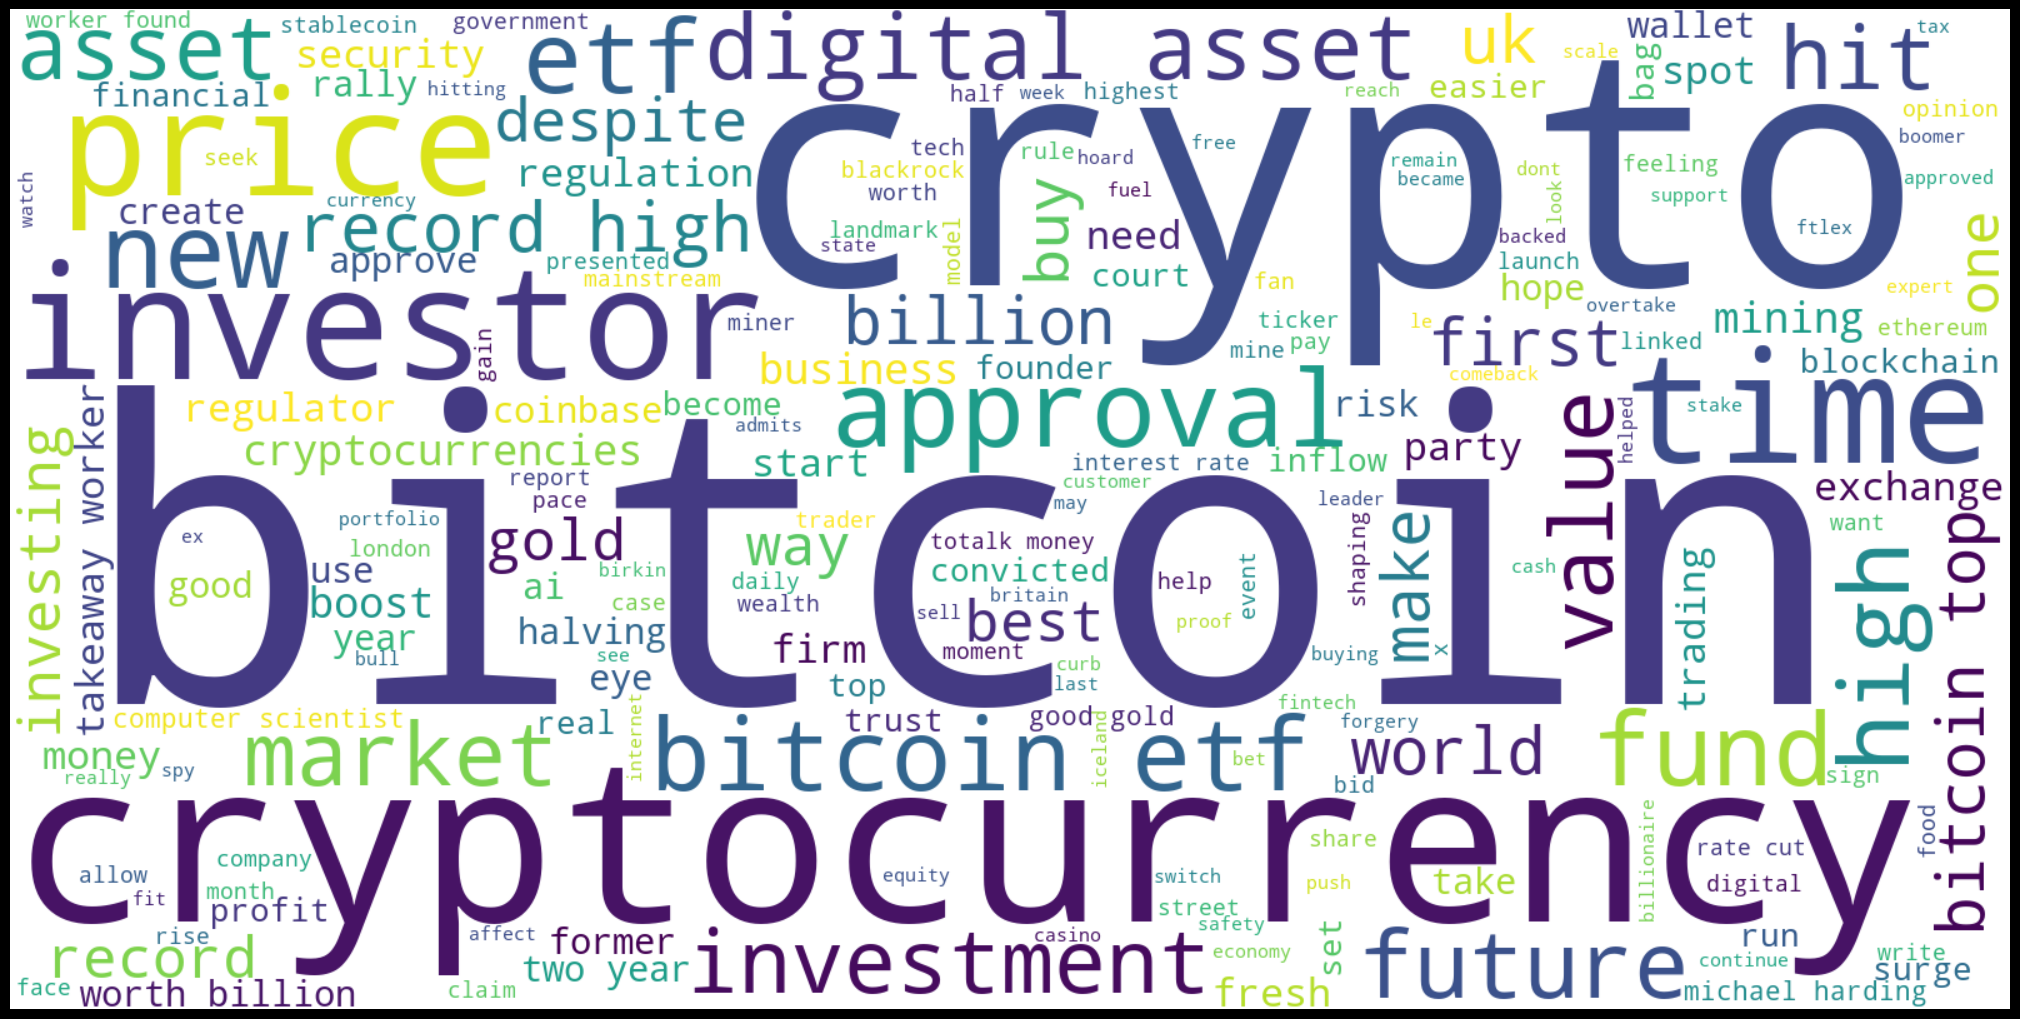

In [52]:
# look at each Sentiment words separately  e.g., negative, positive and neutral

# creating a positive sentiments df by filtering only positive samples
pos_df = dfv[dfv['final_sentiment']=='positive']
text_pos = ' '.join(pos_df['Lem Headline'])

# Create a word cloud

wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text_pos)

# Display the word cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [53]:
# Converting Published date to datetime object
dfv['Published date'] = pd.to_datetime(dfv['Published date'], format='%d/%m/%Y')


In [54]:
# Converting Published date to string object as a new column
dfv['Date'] = dfv['Published date'].dt.strftime('%Y-%m-%d')

In [55]:
# Joining the two dataframes that are sentiment vader dataframe and bitcoin price data frame on common column Date.
merged_df = dfv.merge(dfb, on='Date', how='left')

In [56]:
# Analysing the correlation between compound score and bitcoin closing prices.
filter_df = merged_df[['compound', 'Close']]
filter_df.corr()

,compound,Close
compound,1.000000,-0.061858
Close,-0.061858,1.000000


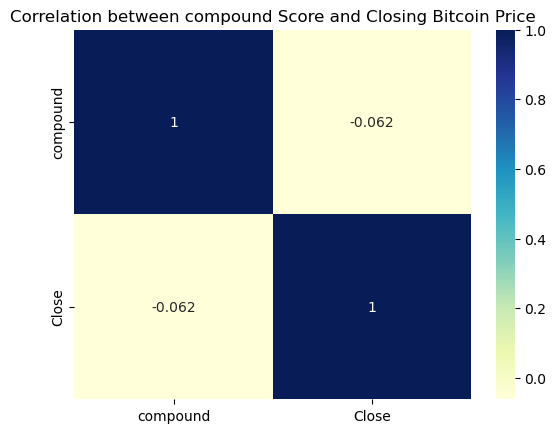

In [57]:
dataplot = sns.heatmap(filter_df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap
plt.title('Correlation between compound Score and Closing Bitcoin Price')
plt.show() 

- A value of -0.061947 indicates a very weak negative correlation.
- This means there's a slight tendency for the compound sentiment score to move in the opposite direction of Bitcoin's closing price, but the relationship is very weak.
- At -0.061947, this correlation is very weak, almost negligible.
- It implies that knowing the sentiment score would not be very helpful in predicting Bitcoin's price, at least in a simple, linear way.

### Analysing Bigrams
This code defines a function plot_bigrams that creates a horisontal bar plot of the top 10 most frequent bigrams (pairs of consecutive words) in a given column of a DataFrame. The resulting plot visualises the most common word pairs in the text data, which can be useful for identifying frequently occurring phrases or patterns in the text.

In [58]:
def plot_bigrams(df_column=None, title=None):
    
    word_data = dfv[df_column].tolist()
    word_data = [i.split(' ') for i in word_data]
    word_data = [item for sublist in word_data for item in sublist]
    bigrams = (pd.Series(nltk.ngrams(word_data, 2)).value_counts())[:10]
    bigrams.sort_values().plot.barh(figsize=(5, 5), title=title)

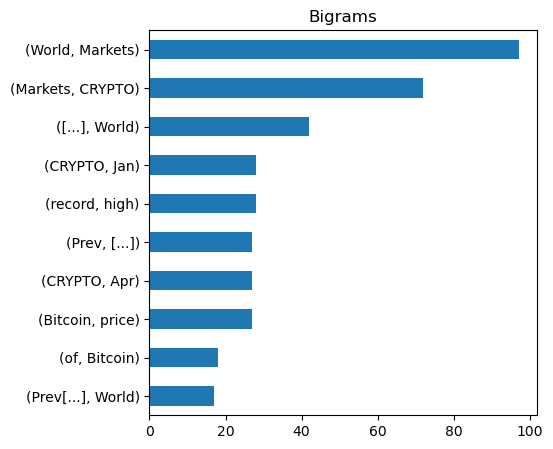

In [59]:
plot_bigrams(df_column='Headline', title='Bigrams')

### Sentiment Trends Over Time

#### The below code a line plot to visualise the Sentiment Trends Over Time. 
The sentiment analysis of Bitcoin-related headlines from December 2023 to June 2024 reveals a generally positive trend, with most monthly averages falling above the neutral line. There are noticeable fluctuations throughout the period, with sentiment peaking in early 2024 and again in April-May 2024. The lowest point occurs in March 2024, but it quickly recovers. Despite some volatility, the overall sentiment remains predominantly positive, suggesting a generally optimistic outlook on Bitcoin in media coverage during this timeframe. The trend line shows resilience, quickly bouncing back from dips, which might indicate a robust and persistent positive sentiment towards Bitcoin in the analysed headlines. 

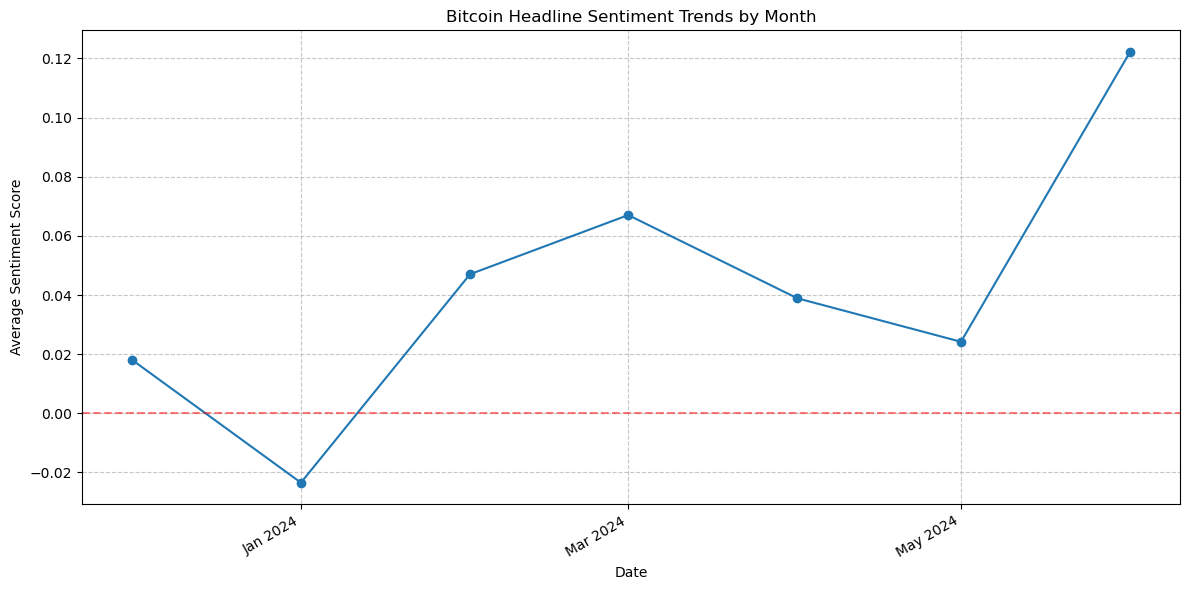

   Year  Month  Sentiment       Date
0  2023     12   0.018140 2023-12-01
1  2024      1  -0.023448 2024-01-01
2  2024      2   0.047042 2024-02-01
3  2024      3   0.067037 2024-03-01
4  2024      4   0.038905 2024-04-01


In [64]:
# change sentiment column to sentiment_column
sentiment_column = 'Sentiment'

# Convert 'Published date' to datetime
dft['Published date'] = pd.to_datetime(dft['Published date'], format='%d/%m/%Y')

# Extract year and month
dft['Year'] = dft['Published date'].dt.year
dft['Month'] = dft['Published date'].dt.month

# Group by Year and Month, calculate average sentiment
monthly_sentiment = dft.groupby(['Year', 'Month'])[sentiment_column].mean().reset_index()

# Create a date column for plotting
monthly_sentiment['Date'] = pd.to_datetime(monthly_sentiment[['Year', 'Month']].assign(DAY=1))

# Sort by date
monthly_sentiment = monthly_sentiment.sort_values('Date')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment['Date'], monthly_sentiment[sentiment_column], marker='o')
plt.title('Bitcoin Headline Sentiment Trends by Month')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Tight layout to prevent cutting off labels
plt.tight_layout()

# Save the plot as an image file
plt.savefig('bitcoin_sentiment_trends_monthly.png')

# Show the plot
plt.show()

# Print the first few rows of monthly_sentiment for verification
print(monthly_sentiment.head())

### Little bit more explanation of pie chat results. 

The pie chart shows that VADER identifiedsignificant  negative sentiment score compared to TextBlob for same dat |(text). This can be due their distinct approaches to sentiment analysis. VADER is specifically attuned to sentiments expressed in social media and works well with short texts, while TextBlob uses a more general approach based on a pre-trained model. Their difference in their underlying mechanisms - VADER's rule-based approach versus TextBlob's machine learning model - can lead to varying interpretations of the same text, especially when dealing with context-dependent or ambiguous sentiment expressions.
